# Inverse Problems and Imaging
## Reverse time and Kirchoff migration

The goal of this work is to study the localization by reverse time migration in several configurations and to evaluate the resolution and the stability of this method in comparaison of other classical methods. This document aims to explain how the results commented in the report (accesssible HERE) has been obtained and how one can use our code to reproduce these results. All the source code used in this notebook is present in the `./src/` directory.

In [1]:
import numpy as np
import time
import os
os.chdir('./src/')

All the function in the source code are provided with an help descriptor, for instance: 

In [11]:
from full_aperture import generate_dataset
?generate_dataset

### Time harmonic localization - Full aperture

Elapsed time: 68.45 s


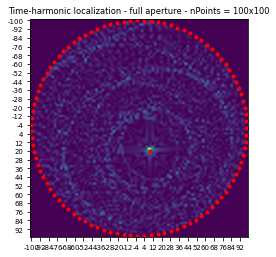

In [7]:
from full_aperture import (generate_dataset, generate_transducters, imaging_KM,
                               heatmap, plot_heatmap)
# PARAMETERS DEFINITION
OMEGA = np.pi
R0    = 100
N     = 100
x_ref = np.array([[10],[20]])
# DATASET
start    = time.time()
transdus = generate_transducters(N, R0)
data     = generate_dataset(OMEGA, green, transdus, x_ref)
i_rt     = heatmap(imaging_KM, green, transdus, data, OMEGA, x_ref, R0)
stop     = time.time()
# PLOT
print("Elapsed time: {:.2f} s".format(stop-start))
plot_heatmap(i_rt, x_ref, R0, transdus)

### Time harmonic localization - Partial aperture

Elapsed time: 75.18 s


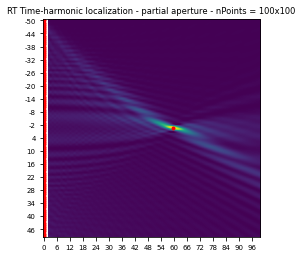

In [9]:
from full_aperture import (generate_dataset, green, imaging_KM, imaging_RT,
                           norm)
from partial_aperture import (heatmap, generate_transducters, plot_heatmap)
# PARAMETERS DEFINITION
OMEGA = np.pi
R0    = 100
N     = 100
x_ref = np.array([[60.],[0.]])
# DATASET
start    = time.time()
transdus = generate_transducters(N, R0)
data     = generate_dataset(OMEGA, green, transdus, x_ref)
i_rt     = heatmap(imaging_MU, green, transdus, data, OMEGA, x_ref, R0)
stop     = time.time()
# PLOT
print("Elapsed time: {:.2f} s".format(stop-start))
plot_heatmap(i_rt, x_ref, R0, transdus)

### Time dependent localization - Partial aperture

Elapsed time: 105.64 s


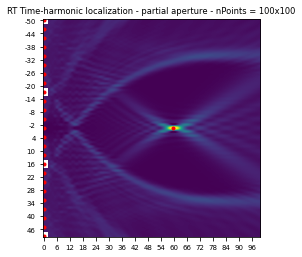

In [5]:
from full_aperture import green
from partial_aperture import (generate_transducters, imaging_KM, imaging_MU,
                              imaging_RT, imaging_TH, plot_heatmap)
from time_dependant_loc import generate_dataset, heatmap

# PARAMETERS DEFINITION
OMEGA = np.pi
n_w   = 20
B     = .05*OMEGA
w     = np.linspace(OMEGA-B, OMEGA+B, n_w)
R0    = 100
N     = 25
x_ref = np.array([[60.],[0.]])
# DATASET
start    = time.time()
transdus = generate_transducters(N, R0)
data     = generate_dataset(w, green, transdus, x_ref)
i_rt     = heatmap(imaging_KM, green, transdus, data, w)
stop     = time.time()
# PLOT
print("Elapsed time: {:.2f} s".format(stop-start))
plot_heatmap(i_rt, x_ref, R0, transdus)

### Stability with respect to measurement noise

Elapsed time: 78.51 s


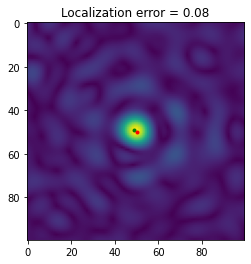

In [3]:
from full_aperture import (generate_transducters, green, heatmap, imaging_KM,
                           imaging_RT, norm, plot_heatmap)
from partial_aperture import imaging_MU

from noisy_loc import generate_dataset, plot_heatmap
# PARAMETERS DEFINITION
OMEGA = np.pi
R0    = 75
N     = 100
sigma = 8e-3
x_ref = np.array([[0.],[0.]])
x_min = -3
x_max = 3
size  = 100
#  DATASET
r        = R0
start    = time.time()
transdus = generate_transducters(N, r)
data     = generate_dataset(OMEGA, green, transdus, x_ref, sigma)
i_rt     = heatmap(imaging_RT, green, transdus, data, OMEGA, x_ref, r, x_min=x_min, x_max=x_max, size=size)
stop     = time.time()
# PLOT
print("Elapsed time: {:.2f} s".format(stop-start))
# plot_heatmap(i_rt, x_ref, R0, transdus, OMEGA)
plot_heatmap(i_rt, x_ref, R0, transdus, OMEGA, x_min, x_max, size)

From these basic functions, we proposed a statistical approach to study the stability of these localization methods. The associated code is in the `./src/stability/` directory.

### Credits

Work realised by Nicolas ATIENZA and Thomas CHAPALAIN for the _Inverse Problem and Imaging_ class of the MVA Master.